##📌 EXTRACCIÓN

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/content/TelecomX_Data_Limpio.csv')
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Cuentas_Diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,No,DSL,...,No,Yes,Yes,No,One year,1,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,0,Male,0,0,0,9,1,Yes,DSL,...,No,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,1,Male,0,0,0,4,1,No,Fiber optic,...,Yes,No,No,No,Month-to-month,1,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,1,Male,1,1,0,13,1,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,1,Female,1,1,0,3,1,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.9,267.40,2.80


In [42]:
# Ver las columnas disponibles
df.columns

Index(['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
       'account.Charges.Monthly', 'account.Charges.Total', 'Cuentas_Diarias'],
      dtype='object')

In [43]:
#verificar la estructura general
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   int64  
 2   customer.gender            7043 non-null   object 
 3   customer.SeniorCitizen     7043 non-null   int64  
 4   customer.Partner           7043 non-null   int64  
 5   customer.Dependents        7043 non-null   int64  
 6   customer.tenure            7043 non-null   int64  
 7   phone.PhoneService         7043 non-null   int64  
 8   phone.MultipleLines        7043 non-null   object 
 9   internet.InternetService   7043 non-null   object 
 10  internet.OnlineSecurity    7043 non-null   object 
 11  internet.OnlineBackup      7043 non-null   object 
 12  internet.DeviceProtection  7043 non-null   object 
 13  internet.TechSupport       7043 non-null   objec

In [44]:
# Verifica si hay valores únicos en cada columna
for col in df.columns:
  print(f"valores únicos en la columna'{col}': {df[col].nunique()}")
  if df[col].nunique() < 10: # Imprima los valores solamente si no hay muchos
    print(df[col].unique())
    print('_' * 60)  # Línea divisoria para mejor visualización

valores únicos en la columna'customerID': 7043
valores únicos en la columna'Churn': 2
[0 1]
____________________________________________________________
valores únicos en la columna'customer.gender': 2
['Female' 'Male']
____________________________________________________________
valores únicos en la columna'customer.SeniorCitizen': 2
[0 1]
____________________________________________________________
valores únicos en la columna'customer.Partner': 2
[1 0]
____________________________________________________________
valores únicos en la columna'customer.Dependents': 2
[1 0]
____________________________________________________________
valores únicos en la columna'customer.tenure': 73
valores únicos en la columna'phone.PhoneService': 2
[1 0]
____________________________________________________________
valores únicos en la columna'phone.MultipleLines': 3
['No' 'Yes' 'No phone service']
____________________________________________________________
valores únicos en la columna'internet.Intern

##🛠️ Preparación de los Datos


 ✔️ Remover columnas irrelevantes

Excluyendo variables que:

* No tienen valor predictivo (ej.: identificadores únicos).
* Son redundantes con otras.
* Pueden causar fuga de datos (*data leakage*).


In [45]:
df = df.drop(columns=['customerID'])

 ✔️ Agrupación de No y No service

✅ **Resumen: Por qué agrupamos `"No"` y `"No internet service"`**

🎯 **Objetivo**

Reducir **multicolinealidad** y **simplificar los datos** sin perder relevancia para el modelo predictivo.

---

⚠️ **El problema original**

* Variables como `OnlineSecurity`, `StreamingTV`, etc., tenían **tres categorías**:

  * `"Yes"` → cliente usa el servicio
  * `"No"` → cliente tiene internet, pero no contrató el servicio
  * `"No internet service"` → cliente **ni siquiera tiene internet**, por lo tanto no puede usar el servicio

* Esto generaba **multicolinealidad perfecta** al transformar estas categorías en *dummies*, lo que:

  * Creaba **correlación 1.0** entre variables
  * Generaba **VIF infinito**
  * Comprometía la estabilidad y el rendimiento de los modelos

---

✅ **La solución: agrupar `"No internet service"` como `"No"`**

* **Agrupamos** `"No internet service"` como `"No"` para simplificar la variable:

  * Ahora: `"Yes"` = usa el servicio
    `"No"` = no usa el servicio (por cualquier motivo)

* Esto **reduce la dimensionalidad** y **evita multicolinealidad**.

* La información de que el cliente **no tiene internet** sigue estando en la variable `InternetService`.

---

🧠 **¿Y el impacto?**

* Perdemos un matiz (por qué el cliente no usa el servicio), **pero**:

  * Esto rara vez afecta el rendimiento del modelo
  * Ganamos **más robustez, menos ruido y menos redundancia**


In [46]:
# para crear uno nuevo
df_clean = df.copy()

# === Etapa 1: Agrupar "No internet service" como "No"
cols_to_fix = [
    'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection',
    'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies'
]

for col in cols_to_fix:
    df_clean[col] = df_clean[col].replace('No internet service', 'No')

# === Etapa 2: One-hot encoding (sin dummy trap)
categorical_cols = [
       'Churn', 'customer.gender', 'customer.Partner', 'customer.Dependents',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod'
]

df_encoded = pd.get_dummies(df_clean, columns=categorical_cols, drop_first=True)

# ¡Listo para usar!
df_encoded

,customer.SeniorCitizen,customer.tenure,account.Charges.Monthly,account.Charges.Total,Cuentas_Diarias,Churn_1,customer.gender_Male,customer.Partner_1,customer.Dependents_1,phone.PhoneService_1,...,internet.DeviceProtection_Yes,internet.TechSupport_Yes,internet.StreamingTV_Yes,internet.StreamingMovies_Yes,account.Contract_One year,account.Contract_Two year,account.PaperlessBilling_1,account.PaymentMethod_Credit card (automatic),account.PaymentMethod_Electronic check,account.PaymentMethod_Mailed check
0,0,9,65.60,593.30,2.19,False,False,True,True,True,...,False,True,True,False,True,False,True,False,False,True
1,0,9,59.90,542.40,2.00,False,True,False,False,True,...,False,False,False,True,False,False,False,False,False,True
2,0,4,73.90,280.85,2.46,True,True,False,False,True,...,True,False,False,False,False,False,True,False,True,False
3,1,13,98.00,1237.85,3.27,True,True,True,False,True,...,True,False,True,True,False,False,True,False,True,False
4,1,3,83.90,267.40,2.80,True,False,True,False,True,...,False,True,True,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,13,55.15,742.90,1.84,False,False,False,False,True,...,False,True,False,False,True,False,False,False,False,True
7039,0,22,85.10,1873.70,2.84,True,True,True,False,True,...,False,False,False,True,False,False,True,False,True,False
7040,0,2,50.30,92.75,1.68,False,True,False,False,True,...,False,False,False,False,False,False,True,False,False,True
7041,0,67,67.85,4627.65,2.26,False,True,True,True,True,...,True,True,False,True,False,True,False,False,False,True


In [47]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   customer.SeniorCitizen                         7043 non-null   int64  
 1   customer.tenure                                7043 non-null   int64  
 2   account.Charges.Monthly                        7043 non-null   float64
 3   account.Charges.Total                          7043 non-null   float64
 4   Cuentas_Diarias                                7043 non-null   float64
 5   Churn_1                                        7043 non-null   bool   
 6   customer.gender_Male                           7043 non-null   bool   
 7   customer.Partner_1                             7043 non-null   bool   
 8   customer.Dependents_1                          7043 non-null   bool   
 9   phone.PhoneService_1                           7043 

✔️ Verificación nuevamente de los valores nulos


In [48]:
df_encoded.isnull().sum()

,0
customer.SeniorCitizen,0
customer.tenure,0
account.Charges.Monthly,0
account.Charges.Total,0
Cuentas_Diarias,0
Churn_1,0
customer.gender_Male,0
customer.Partner_1,0
customer.Dependents_1,0
phone.PhoneService_1,0


In [51]:
# Verifica valores nulos en las dos columnas
print(df_encoded[['Cuentas_Diarias', 'account.Charges.Total']].isnull().sum())

Cuentas_Diarias          0
account.Charges.Total    0
dtype: int64


In [52]:
# Elimina filas con valores nulos en las columnas especificadas
df_encoded = df_encoded.dropna(subset=['Cuentas_Diarias', 'account.Charges.Total'])

**Tratamiento de valores nulos**

Al identificar valores nulos en las columnas `Total.Day` y `account.Charges.Total`, es necesario decidir entre **eliminar** o **rellenar** esas entradas.

* **Eliminar filas**: como el número de valores nulos es pequeño (11 filas en más de 7 mil), podemos eliminar esas filas sin afectar el análisis. Esto evita introducir distorsiones en los resultados.

* **Reemplazar por cero**: esta opción puede usarse cuando el valor nulo representa ausencia de dato o servicio (por ejemplo, ninguna cobranza), pero puede distorsionar promedios y sumas si no es el caso real.

En este proyecto, optamos por **eliminar las filas con valores nulos** por seguridad y simplicidad, asegurando que los datos usados estén completos.


In [53]:
df_encoded.isnull().sum()

,0
customer.SeniorCitizen,0
customer.tenure,0
account.Charges.Monthly,0
account.Charges.Total,0
Cuentas_Diarias,0
Churn_1,0
customer.gender_Male,0
customer.Partner_1,0
customer.Dependents_1,0
phone.PhoneService_1,0


✔️ Normalización/Estandarización


🔄 Normalización de los datos

La normalización es un paso común en el preprocesamiento de datos, especialmente importante para algoritmos que son **sensibles a la escala de los atributos**, como:

* KNN (K-Nearest Neighbors)
* Redes Neuronales
* Regresión Logística
* SVM (Support Vector Machine)

Modelos basados en árboles (como Decision Tree, Random Forest y XGBoost) **no requieren normalización**, ya que no dependen de la escala de los datos para construir sus reglas de decisión.

En este proyecto, aplicaremos la **normalización Min-Max**, que transforma los valores al rango **\[0, 1]**. Esto ayuda a garantizar que todas las variables numéricas contribuyan de forma equilibrada al modelo.

```python
from sklearn.preprocessing import MinMaxScaler

# Seleccionando solo columnas numéricas (excepto la variable target, si ya está separada)
colunas_numericas = dados.select_dtypes(include=['int64', 'float64']).columns

# Inicializando el scaler
scaler = MinMaxScaler()

# Aplicando la normalización
dados[colunas_numericas] = scaler.fit_transform(dados[colunas_numericas])

# Mostrando los datos normalizados
dados.head()
```


## ≡ Correlación entre las variables


In [58]:
corr = df_encoded.corr()

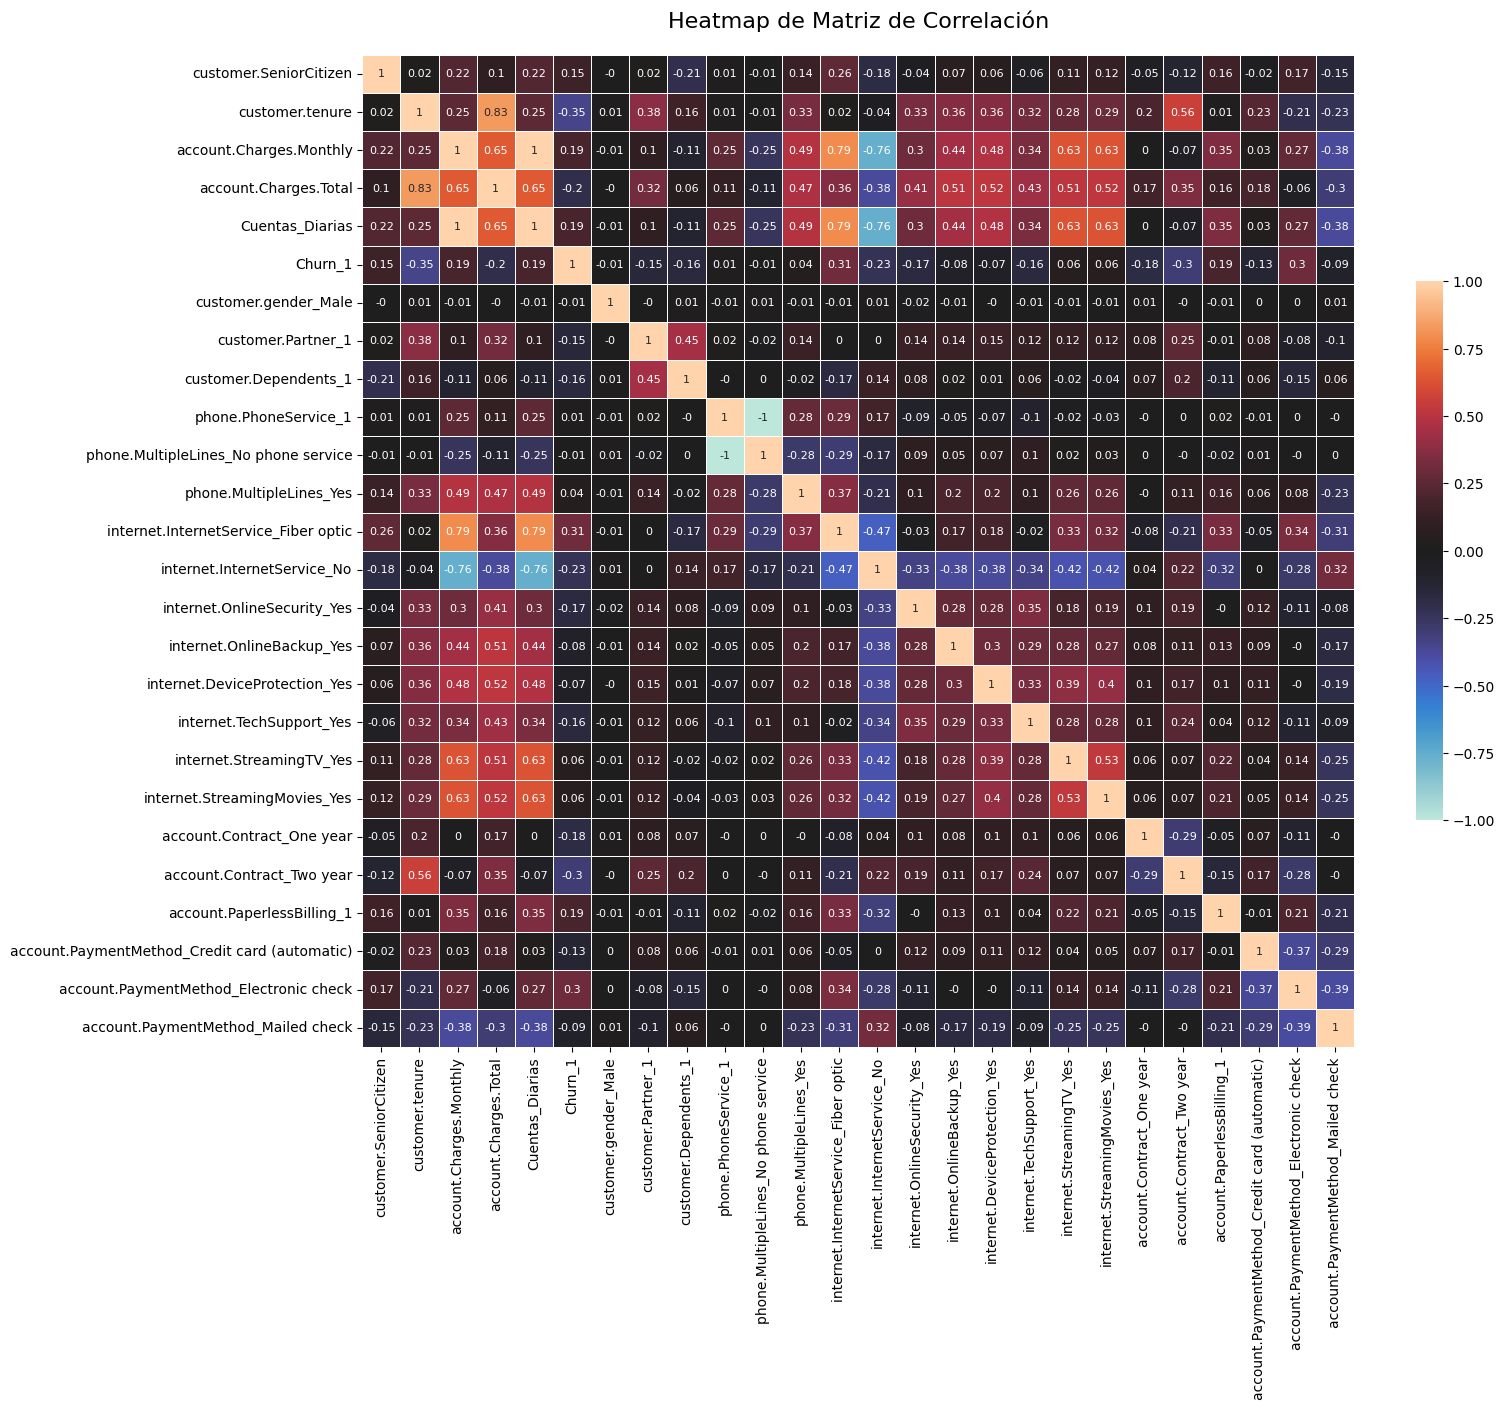

In [96]:
fig, ax = plt.subplots(figsize=(16,14))
ax = sns.heatmap(
    np.round(corr, 2),
    vmax=1, vmin=-1, center=0,
    square=True, linewidths=.5,
    annot=True,
    annot_kws={"size": 8},
    cbar_kws={"shrink": .5}
)
plt.title("Heatmap de Matriz de Correlación", fontsize=16, pad=20)
plt.show()



In [70]:
print(corr.columns)  # o corr.index, que es igual


Index(['customer.SeniorCitizen', 'customer.tenure', 'account.Charges.Monthly',
       'account.Charges.Total', 'Cuentas_Diarias', 'Churn_1',
       'customer.gender_Male', 'customer.Partner_1', 'customer.Dependents_1',
       'phone.PhoneService_1', 'phone.MultipleLines_No phone service',
       'phone.MultipleLines_Yes', 'internet.InternetService_Fiber optic',
       'internet.InternetService_No', 'internet.OnlineSecurity_Yes',
       'internet.OnlineBackup_Yes', 'internet.DeviceProtection_Yes',
       'internet.TechSupport_Yes', 'internet.StreamingTV_Yes',
       'internet.StreamingMovies_Yes', 'account.Contract_One year',
       'account.Contract_Two year', 'account.PaperlessBilling_1',
       'account.PaymentMethod_Credit card (automatic)',
       'account.PaymentMethod_Electronic check',
       'account.PaymentMethod_Mailed check'],
      dtype='object')


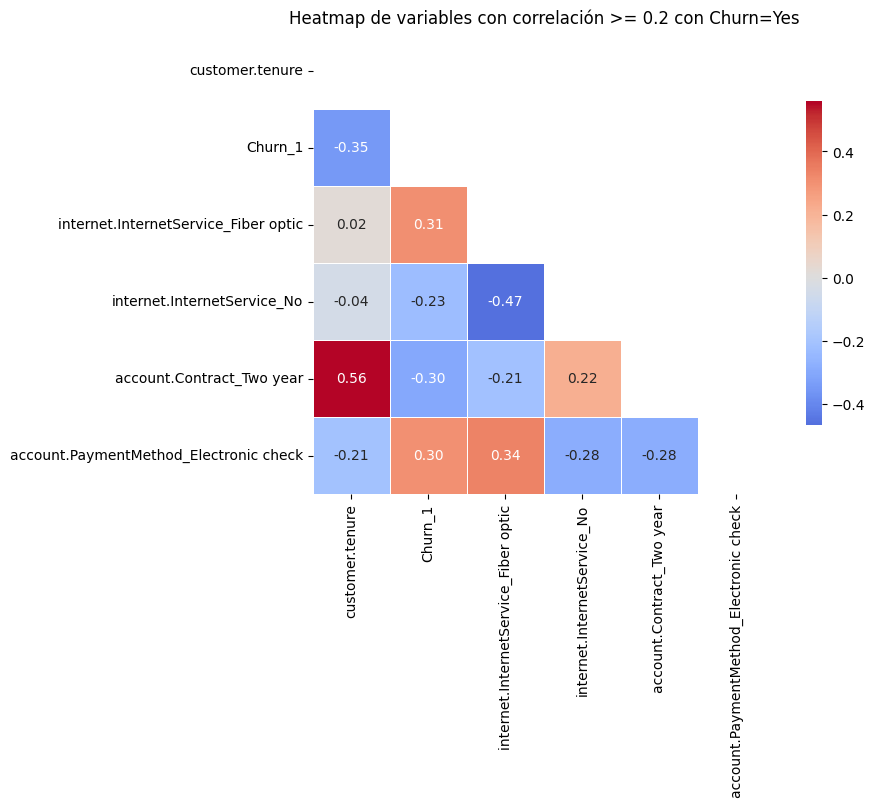

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Definir la variable objetivo
target_var = 'Churn_1'

# Definir el umbral mínimo de correlación absoluta para la selección
umbral = 0.2

# Filtrar variables que tengan correlación absoluta >= umbral con la variable objetivo
# Esto crea una lista con las variables relevantes
variables_relevantes = corr.index[abs(corr[target_var]) >= umbral].tolist()

# Asegurar que la variable objetivo esté en la lista (si no está, añadirla)
if target_var not in variables_relevantes:
    variables_relevantes.append(target_var)

# Crear una matriz de correlación solo con las variables seleccionadas
corr_filtrada = corr.loc[variables_relevantes, variables_relevantes]

# Generar una máscara para ocultar el triángulo superior de la matriz (incluida la diagonal)
mascara = np.triu(np.ones_like(corr_filtrada, dtype=bool))

# Graficar el heatmap con la máscara aplicada para mejor visualización
plt.figure(figsize=(8,6))
sns.heatmap(
    corr_filtrada,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.7},
    mask=mascara
)
plt.title(f'Heatmap de variables con correlación >= {umbral} con Churn=Yes')
plt.show()

Para hacer el heatmap más legible y enfocado en las relaciones importantes, lo vamos a reducir a un umbral de 0.2. Esto significa que solo vamos a mirar variables cuya correlación con `"Evasión"` sea $\geq 0.2$, ya sea positiva o negativa, puesto que se calculará en valor absoluto.

Adicionalmente, crearemos una máscara para ocultar el triángulo superior de la matriz. Esto se puede hacer porque dicha matriz es simétrica respecto de la diagonal, por lo que la parte oculta no aporta más información.


---

**Análisis del nuevo heatmap de correlación** Recordando que el gráfico muestra **correlaciones ≥ 0.2** (o ≤ -0.2) con la variable objetivo `Churn_1`.

---

**Correlación con `Churn_1` (variable objetivo)**

| Variable                                 | Correlación con Churn\_Yes | Interpretación                                                                                                               |
| ---------------------------------------- | -------------------------- | ---------------------------------------------------------------------------------------------------------------------------- |
| `internet.InternetService_Fiber optic`   | **+0.31**                  | Clientes con fibra óptica tienen **mayor probabilidad de churn**. Puede estar relacionado al costo o a la competitividad.    |
| `account.PaymentMethod_Electronic check` | **+0.30**                  | Pagos por cheque electrónico están asociados a más churn — quizás por perfil de cliente menos fidelizado.                    |
| `account.Contract_Two year`              | **-0.30**                  | Contratos de 2 años reducen el churn (clientes más comprometidos o con beneficios)                                           |
| `customer.tenure`                        | **-0.35**                  | Cuanto mayor el tiempo como cliente, menor la probabilidad de churn — esperado                                               |
| `internet.InternetService_No`            | **-0.23**                  | Quienes **no usan internet** tienden a churnar menos — posiblemente perfiles más estables (adultos mayores, menos digitales) |


## Análisis de Multicolinealidad


1. Importar las bibliotecas necesarias


In [100]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

2. Seleccionar las variables independientes


In [102]:
X = df_encoded.drop(columns=['Churn_1'])

3. Añadir constante (intercepto)

In [103]:
X_const = add_constant(X)

4. Calcular el VIF

In [116]:
X_const = X_const.astype(float)

# Calcular el VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

# Mostrar resultado
display(vif_data.sort_values(by='VIF', ascending=False))

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,feature,VIF
9,phone.PhoneService_1,inf
10,phone.MultipleLines_No phone service,inf
3,account.Charges.Monthly,1.159638e+05
5,Cuentas_Diarias,1.153462e+05
12,internet.InternetService_Fiber optic,1.482880e+02
13,internet.InternetService_No,1.042298e+02
19,internet.StreamingMovies_Yes,2.411189e+01
18,internet.StreamingTV_Yes,2.406059e+01
4,account.Charges.Total,1.079572e+01
2,customer.tenure,7.527306e+00


**Resumen general del análisis VIF**

| Rango de VIF       | Interpretación                |
| ------------------ | ----------------------------- |
| VIF ≈ 1            | Sin multicolinealidad         |
| 1 < VIF < 5        | Baja (aceptable)              |
| 5 ≤ VIF < 10       | Moderada (vigilar)            |
| VIF ≥ 10           | Alta (¡atención!)             |
| VIF = ∞ (infinito) | Multicolinealidad perfecta  |

---

**Principales alertas**

1. "phone.PhoneService_Yes" y "phone.MultipleLines_No phone service"  con VIF  $\infty$. Estas dos variables siguen siendo perfectamente colineales entre sí o con otra variable. Posiblemente debido a que ambas provienen de la misma variable categórica original (PhoneService), y el encoding generó redundancia. Si el cliente no tiene teléfono, entonces no puede tener múltiples líneas, por lo que los valores están 100% ligados.

2. "account.Charges.Monthly" es extremadamente alto. Esta variable está altamente correlacionada con "account.Charges.Total" y "Cuentas_Diarias".

3. Otros VIFs altos (moderados a severos):

| Variable |  Comentario |
| --------------------------------- | ------------------------------------------- |
| `InternetService_Fiber optic`     |  Altamente colineal con `InternetService_No` |
| `InternetService_No`              |  Mismo motivo anterior                       |
| `StreamingTV` / `StreamingMovies` |  Dependen directamente de tener internet     |
| `Charges.Total`                   |  Relacionado con `Monthly` y `tenure`        |


**VIF REHECHO**

In [118]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# ====== Etapa 1: Copiar X original para no modificar el original ======
X_filtered = X_const.copy()

# ====== Etapa 2: Eliminar variables con multicolinealidad perfecta (VIF = inf) ======
cols_to_drop = [
    "phone.PhoneService_1",
    "phone.MultipleLines_No phone service"
]
X_filtered.drop(columns=cols_to_drop, inplace=True)

# ====== Etapa 3: Eliminar redundancias fuertes entre variables numéricas ======
X_filtered.drop(columns=["Cuentas_Diarias"], inplace=True)

# ====== Etapa 4: Eliminar redundancia entre dummies de la misma variable categórica ======
# Se utilizó get_dummies sin drop_first, tienes dummies redundantes para InternetService.
X_filtered.drop(columns=["internet.InternetService_No"], inplace=True)

# ====== Etapa 5: Garantizar que los datos estén en float para que el VIF funcione ======
X_filtered = X_filtered.astype(float)

# ====== Etapa 6: Recalcular el VIF ======
vif_data = pd.DataFrame()
vif_data["feature"] = X_filtered.columns
vif_data["VIF"] = [variance_inflation_factor(X_filtered.values, i) for i in range(X_filtered.shape[1])]

# ====== Etapa 7: Mostrar los resultados ======
display(vif_data.sort_values(by="VIF", ascending=False))

,feature,VIF
0,const,36.456954
3,account.Charges.Monthly,18.159094
4,account.Charges.Total,10.687811
2,customer.tenure,7.492501
9,internet.InternetService_Fiber optic,6.997677
17,account.Contract_Two year,2.512990
15,internet.StreamingMovies_Yes,2.189029
14,internet.StreamingTV_Yes,2.187416
20,account.PaymentMethod_Electronic check,1.967547
21,account.PaymentMethod_Mailed check,1.850909


Análisis del nuevo VIF

| Rango de VIF | Interpretación                      |
| ------------ | ----------------------------------- |
| VIF ≈ 1      | Sin multicolinealidad (óptimo)      |
| 1 < VIF ≤ 5  | Baja (aceptable)                    |
| 5 < VIF ≤ 10 | Moderada (vigilar)                  |
| VIF > 10     | Alta (atención o posible exclusión) |

Puntos importantes en el resultado:

| Variable                  | VIF     | Observaciones                                                                               |
| ------------------------- | ------- | ------------------------------------------------------------------------------------------- |
| `account.Charges.Monthly` | 18.17   | Aún con multicolinealidad alta — puede estar correlacionada con `Charges.Total` y `tenure`. |
| `account.Charges.Total`   | 10.69   | Justo en el límite — posible redundancia con `Monthly` y `tenure`                           |
| `const`                   | 36.46   | **Normal** para la constante (`const`) — se puede ignorar                                   |
| Resto                     | 1.0–7.5 | Todos con VIF **aceptable u óptimo**                                                      |

---

Conclusión práctica

* La multicolinealidad crítica fue resuelta (sin $\infty$, sin redundancia perfecta).
* Solo "Charges.Monthly" y "Charges.Total" siguen colineales entre sí (esto ya era esperado).




**VIF 2**

---

Eliminando una de las dos variables ("Monthly" o "Total") para reducir el VIF y simplificar. Luego se recalcula el VIF para confirmar que el problema desaparece.

In [119]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# === Eliminar la variable account.Charges.Total ===
X_final = X_filtered.drop(columns=["account.Charges.Total"])

# === Recalcular el VIF ===
vif_data_final = pd.DataFrame()
vif_data_final["feature"] = X_final.columns
vif_data_final["VIF"] = [variance_inflation_factor(X_final.values, i) for i in range(X_final.shape[1])]

# === Mostrar los resultados ordenados ===
display(vif_data_final.sort_values(by="VIF", ascending=False))


,feature,VIF
0,const,29.594502
3,account.Charges.Monthly,17.284744
8,internet.InternetService_Fiber optic,6.934263
2,customer.tenure,2.783636
16,account.Contract_Two year,2.502672
13,internet.StreamingTV_Yes,2.165570
14,internet.StreamingMovies_Yes,2.164623
19,account.PaymentMethod_Electronic check,1.964292
20,account.PaymentMethod_Mailed check,1.828498
12,internet.TechSupport_Yes,1.712057


## Modelos Predictivos


Importación de las bibliotecas

In [120]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

 Separar *features* y *target*

In [121]:
X = df_encoded.drop(columns=['Churn_1'])
y = df_encoded['Churn_1']

Dividir entrenamiento y prueba


In [122]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


**Normalizar**

* Vamos a entrenar "Regresión Logística", que se beneficia de la normalización.

* En cambio, "Random Forest" no necesita normalización, pero como estamos usando los mismos datos para ambos modelos, los normalizamos para mantener consistencia y simplicidad.


In [123]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Balancear entrenamiento con SMOTE, porque ya verificamos anteriormente que la proporción de churn estaba desbalanceada.


In [124]:
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_scaled, y_train)

**Regresión Logística**


In [125]:
# Instanciar y entrenar
lr = LogisticRegression(random_state=42)
lr.fit(X_train_bal, y_train_bal)

# Predicciones
y_pred_lr = lr.predict(X_test_scaled)
y_prob_lr = lr.predict_proba(X_test_scaled)[:, 1]

# Evaluación
print("Regresión Logística")
print("Exactitud:", accuracy_score(y_test, y_pred_lr))
print("ROC AUC:", roc_auc_score(y_test, y_prob_lr))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Regresión Logística
Exactitud: 0.7439659252247989
ROC AUC: 0.839944318870941
Matriz de Confusión:
 [[1125  427]
 [ 114  447]]
              precision    recall  f1-score   support

       False       0.91      0.72      0.81      1552
        True       0.51      0.80      0.62       561

    accuracy                           0.74      2113
   macro avg       0.71      0.76      0.71      2113
weighted avg       0.80      0.74      0.76      2113



**Random Forest**

In [126]:
# Instanciar y entrenar
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_bal, y_train_bal)

# Predicciones
y_pred_rf = rf.predict(X_test_scaled)
y_prob_rf = rf.predict_proba(X_test_scaled)[:, 1]

# Evaluación
print("Random Forest")
print("Exactitud:", accuracy_score(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, y_prob_rf))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest
Exactitud: 0.779460482725982
ROC AUC: 0.8225594713049231
Matriz de Confusión:
 [[1300  252]
 [ 214  347]]
              precision    recall  f1-score   support

       False       0.86      0.84      0.85      1552
        True       0.58      0.62      0.60       561

    accuracy                           0.78      2113
   macro avg       0.72      0.73      0.72      2113
weighted avg       0.78      0.78      0.78      2113

